In [1]:
import numpy as np
import pandas as pd

from skimage import io
import face_recognition
import cv2

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('metadata.csv',index_col=0)

In [3]:
df=df.T

In [4]:
df.head()

,title,views,likes,dislikes,desc,id,clickbait
0,FBI Finally Solve The President’s Twitter Hack,"61,573 views","2,317 likes",89 dislikes,The FBI has finally solved the presidential tw...,F9j-E4z4s4s,1
1,I'm sorry.,"275,300 views","16,622 likes",862 dislikes,I hope you guys understand. I love you all.\n\...,NDnQl5v3bOs,1
2,"Roman Theater with Plautus, Terence, and Senec...","150,840 views","2,611 likes",52 dislikes,In which Mike delves into the theater of ancie...,jQpvph777Pg,0
3,IT HAPPENED SO FAST!!!,"627,908 views","45,721 likes",695 dislikes,THANK YOU ALL SO MUCH!!!\n\nLeave a LIKE if yo...,-W7EeJW_Zdw,1
4,Watch My Stuff or Die Trying,"230,344 views","11,966 likes",403 dislikes,Sign up for DROPOUT: http://bit.ly/2KypG7r​\n\...,ZE6BCfHhfzs,0


In [5]:
df.count()

title        2000
views        1994
likes        1991
dislikes     1991
desc         1991
id           2000
clickbait    2000
dtype: int64

In [7]:
for _id in df["id"][:100]:
    try:
        image=io.imread("https://i.ytimg.com/vi/"+_id+"/maxresdefault.jpg")
        BGR_img=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
        cv2.imwrite("cache/"+str(_id)+".jpg",BGR_img)
    except:
        pass

In [ ]:
total=0

for _id in df["id"][:100]:
    try:
        image=io.imread("https://i.ytimg.com/vi/"+_id+"/maxresdefault.jpg")
        locs=face_recognition.face_locations(image)
        
        for loc in locs:
            t,r,b,l=loc
            BGR_img=cv2.cvtColor(image[t:b,l:r],cv2.COLOR_RGB2BGR)
            cv2.imwrite("dump/"+str(total)+".jpg",BGR_img)
            total+=1
    except:
        pass

In [8]:
from fer import cnn_edit

In [9]:
labels=cnn_edit.label_map
labels

['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [170]:
image=cv2.imread("dump/91.jpg",cv2.IMREAD_GRAYSCALE)

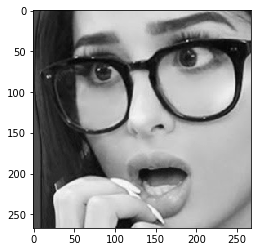

In [171]:
plt.imshow(image,cmap='gray')

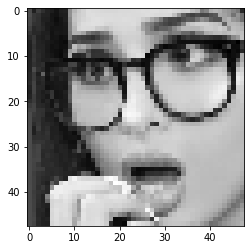

In [172]:
image=cv2.resize(image,(48,48))
plt.imshow(image,cmap='gray')

In [173]:
model=cnn_edit.baseline_model_saved()

In [174]:
image.resize((1,48,48,1))

In [175]:
image.shape

(1, 48, 48, 1)

In [176]:
model(image).numpy()

array([[0., 0., 1., 0., 0., 0., 0.]], dtype=float32)